In [1]:
from typing import List, Tuple, Any
import os
import cv2
from retinaface import RetinaFace

In [3]:
def retinaface_detection_and_save_bboxes(dataset_path: str, destination_path: str) -> Tuple[List[Tuple[str, Any, Any]], List[Tuple[str, Any]], List[List[Tuple[int]]]]:
    """
    Detect faces in images from a specified dataset directory using RetinaFace and categorize them into two lists:
    - Faces detected with bounding box annotations
    - Images with no detected faces
    Additionally, save the annotated images with bounding boxes to separate folders within the destination directory.

    Args:
        - dataset_path (str): The path to the dataset directory containing image files.
        - destination_path (str): The path to the destination directory where modified images and annotations will be saved.

    Returns:
        Tuple[List[Tuple[str, Any, Any]], List[Tuple[str, Any]], List[List[Tuple[int]]]]: 
        A tuple containing three lists:
        - List of tuples with paths to images, images themselves, and corresponding detections.
        - List of tuples with filenames and images where no faces were detected.
        - List of lists containing tuples of bounding box coordinates for each detected face.
    """
    # Initialize lists to store detected faces, images with no faces, and all detections
    faces_detected = []
    no_faces = []
    all_detections = []

    # Define paths for images and annotations in the destination directory
    images_destination_path = os.path.join(destination_path, 'images')
    annotations_destination_path = os.path.join(destination_path, 'labels')

    # Ensure the destination directories exist, create them if not
    os.makedirs(images_destination_path, exist_ok=True)
    os.makedirs(annotations_destination_path, exist_ok=True)

    # List all image files in the dataset directory
    paths = sorted([os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    # Iterate through each image in the dataset
    for path in paths:
        image = cv2.imread(path)
        if image is None:
            continue

        # Detect faces in the image using RetinaFace
        detections = RetinaFace.detect_faces(image)
        base_filename = os.path.basename(path)
        destination_image_path = os.path.join(images_destination_path, base_filename)
        annotation_file_path = os.path.join(annotations_destination_path, base_filename.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt'))

        # Process detections
        if isinstance(detections, dict) and detections:
            # Save bounding box annotations to a text file
            with open(annotation_file_path, 'w') as annotation_file:
                for key, value in detections.items():
                    facial_area = value["facial_area"]
                    # Draw bounding box on the image
                    cv2.rectangle(image, (facial_area[0], facial_area[1]), (facial_area[2], facial_area[3]), (0, 255, 0), 2)
                    # Write annotations in the format: x1, y1, x2, y2
                    annotation_file.write(f"{facial_area[0]} {facial_area[1]} {facial_area[2]} {facial_area[3]}\n")

            # Save the annotated image
            cv2.imwrite(destination_image_path, image)
            # Append information to lists
            faces_detected.append((path, image, detections))
            face_areas = [value["facial_area"] for key, value in detections.items()]
            all_detections.append(face_areas)
        else:
            # Save images with no detected faces
            no_faces.append((base_filename, image))
            all_detections.append([])

    return faces_detected, no_faces, all_detections

In [4]:
test_set = "/Users/jocareher/Downloads/test/images"
predictions_path = "/Users/jocareher/Downloads/retina_predictions"
faces_detected, no_faces, all_detections = retinaface_detection_and_save_bboxes(dataset_path=test_set,
                                                       destination_path=predictions_path)

In [10]:
def retinaface_detection_and_save_bboxes_and_score(dataset_path: str, destination_path: str):

    faces_detected = []
    no_faces = []
    all_detections = []

    images_destination_path = os.path.join(destination_path, 'images')
    annotations_destination_path = os.path.join(destination_path, 'labels')

    os.makedirs(images_destination_path, exist_ok=True)
    os.makedirs(annotations_destination_path, exist_ok=True)

    paths = sorted([os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    for path in paths:
        image = cv2.imread(path)
        if image is None:
            continue

        detections = RetinaFace.detect_faces(path, threshold=0.5)
        base_filename = os.path.basename(path)
        destination_image_path = os.path.join(images_destination_path, base_filename)
        annotation_file_path = os.path.join(annotations_destination_path, base_filename.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt'))

        if isinstance(detections, dict) and detections:
            with open(annotation_file_path, 'w') as annotation_file:
                for key, value in detections.items():
                    score = value["score"]
                    facial_area = value["facial_area"]
                    cv2.rectangle(image, (facial_area[0], facial_area[1]), (facial_area[2], facial_area[3]), (0, 255, 0), 2)
                    # Aquí se modifica para incluir el score antes de las coordenadas
                    annotation_file.write(f"{score:.4f} {facial_area[0]} {facial_area[1]} {facial_area[2]} {facial_area[3]}\n")

            cv2.imwrite(destination_image_path, image)
            faces_detected.append((path, image, detections))
            face_areas = [(value["score"], value["facial_area"]) for key, value in detections.items()]
            all_detections.append(face_areas)
        else:
            no_faces.append((base_filename, image))
            all_detections.append([])

    return faces_detected, no_faces, all_detections

In [11]:
test_set = "/Volumes/JCRH_UPF/benchmark_test_split_rotated/1/images"
predictions_path = "/Users/jocareher/Downloads/1"
faces_detected, no_faces, all_detections = retinaface_detection_and_save_bboxes_and_score(dataset_path=test_set,
                                                       destination_path=predictions_path)

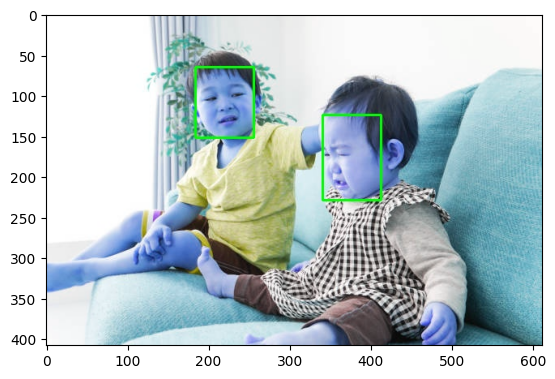

In [8]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/Users/jocareher/Downloads/retina_pred_all/images/extra_faces_33.jpg")
plt.imshow(image)
plt.show()